In [13]:
import numpy as np
from pymatgen.core import Structure
import pymatgen
from pymatgen.ext.matproj import MPRester
import pandas as pd
from pymatgen.core.composition import Composition
import matminer
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import mean_squared_error as MSE
#from sklearn.preprocessing import StandardScaler
#from sklearn.metrics import mean_squared_error, r2_score
#from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

import matminer
#from pymatgen.io.cif import CifParser
#from pymatgen.core.structure import Cifwriter
from pymatgen.core.structure import Structure

In [11]:
api='D32oOhE5YEc2fubxEdCv1khjg6EBIfCL'
with MPRester(api) as mpr:
    search_results4=mpr.summary.search(formula='ABO3',is_gap_direct="True",is_stable="True",fields=["structure","composition","formation_energy_per_atom","formula_pretty","band_gap"])

Retrieving SummaryDoc documents:   0%|          | 0/167 [00:00<?, ?it/s]

In [12]:
search_results4

[MPDataDoc<SummaryDoc>(
 composition=Comp: Cs2 Mg2 Cl6,
 formula_pretty='CsMgCl3',
 structure=Structure Summary
 Lattice
     abc : 7.29291267 7.292912736954026 6.18159097
  angles : 90.0 90.0 119.99999965094622
  volume : 284.72980335970163
       A : 7.29291267 -0.0 -0.0
       B : -3.64645633 6.31584772 0.0
       C : -0.0 0.0 6.18159097
     pbc : True True True
 PeriodicSite: Cs (-0.0000, 4.2106, 4.6362) [0.3333, 0.6667, 0.7500]
 PeriodicSite: Cs (3.6465, 2.1053, 1.5454) [0.6667, 0.3333, 0.2500]
 PeriodicSite: Mg (0.0000, 0.0000, 0.0000) [0.0000, -0.0000, 0.0000]
 PeriodicSite: Mg (0.0000, 0.0000, 3.0908) [0.0000, -0.0000, 0.5000]
 PeriodicSite: Cl (3.6464, 4.3462, 4.6362) [0.8441, 0.6881, 0.7500]
 PeriodicSite: Cl (5.5872, 0.9848, 4.6362) [0.8441, 0.1559, 0.7500]
 PeriodicSite: Cl (0.0000, 1.9696, 1.5454) [0.1559, 0.3119, 0.2500]
 PeriodicSite: Cl (1.7057, 0.9848, 4.6362) [0.3119, 0.1559, 0.7500]
 PeriodicSite: Cl (1.9407, 5.3310, 1.5454) [0.6881, 0.8441, 0.2500]
 PeriodicSite: C

In [14]:
data_list=[]
for result in search_results4:
    data_dict={}
    data_dict['structure']=result.structure
    data_dict['composition']=result.composition.reduced_formula
    data_dict['bandgap']=result.band_gap
    data_list.append(data_dict)

In [16]:
data_list

[{'structure': Structure Summary
  Lattice
      abc : 7.29291267 7.292912736954026 6.18159097
   angles : 90.0 90.0 119.99999965094622
   volume : 284.72980335970163
        A : 7.29291267 -0.0 -0.0
        B : -3.64645633 6.31584772 0.0
        C : -0.0 0.0 6.18159097
      pbc : True True True
  PeriodicSite: Cs (-0.0000, 4.2106, 4.6362) [0.3333, 0.6667, 0.7500]
  PeriodicSite: Cs (3.6465, 2.1053, 1.5454) [0.6667, 0.3333, 0.2500]
  PeriodicSite: Mg (0.0000, 0.0000, 0.0000) [0.0000, -0.0000, 0.0000]
  PeriodicSite: Mg (0.0000, 0.0000, 3.0908) [0.0000, -0.0000, 0.5000]
  PeriodicSite: Cl (3.6464, 4.3462, 4.6362) [0.8441, 0.6881, 0.7500]
  PeriodicSite: Cl (5.5872, 0.9848, 4.6362) [0.8441, 0.1559, 0.7500]
  PeriodicSite: Cl (0.0000, 1.9696, 1.5454) [0.1559, 0.3119, 0.2500]
  PeriodicSite: Cl (1.7057, 0.9848, 4.6362) [0.3119, 0.1559, 0.7500]
  PeriodicSite: Cl (1.9407, 5.3310, 1.5454) [0.6881, 0.8441, 0.2500]
  PeriodicSite: Cl (-1.9407, 5.3310, 1.5454) [0.1559, 0.8441, 0.2500],
  'comp

In [17]:
data_table=pd.DataFrame(data_list)

In [18]:
data_table

,structure,composition,bandgap
0,[[-3.64312300e-06 4.21056725e+00 4.63619323e...,CsMgCl3,5.1261
1,"[[ 1.26431033 11.37163932 9.25438642] K, [ 3....",KPO3,5.0422
2,"[[0. 2.43009094 2.43009094] Ca, [2.430...",Ca3SbN,0.4075
3,"[[0.07381727 0.06915098 0.07915934] K, [2.3929...",KBrO3,3.8569
4,"[[2.73473231 2.96300743 5.72726972] Ca, [2.637...",CaTiO3,2.3053
...,...,...,...
162,"[[0.08584993 5.48119498 2.00744742] Nd, [2.876...",NdScO3,4.3025
163,"[[4.33587475 0.0114673 5.41157135] Cs, [4.356...",CsSnCl3,2.9154
164,"[[3.46034071 3.78403938 2.49399676] Ba, [0.049...",BaHfS3,1.2524
165,"[[1.23586639 0.88063458 5.01608246] Dy, [1.030...",DyBO3,5.3594


Note :we are going to apply matminer featurizers to generate featurizers based on structure and composition,but the composition is not in pymatgen composition format, convert it into pymatgen composition format.

In [19]:
data_table["composition"]=data_table["composition"].apply(lambda x:Composition(x))

In [20]:
data_table


,structure,composition,bandgap
0,[[-3.64312300e-06 4.21056725e+00 4.63619323e...,"(Cs, Mg, Cl)",5.1261
1,"[[ 1.26431033 11.37163932 9.25438642] K, [ 3....","(K, P, O)",5.0422
2,"[[0. 2.43009094 2.43009094] Ca, [2.430...","(Ca, Sb, N)",0.4075
3,"[[0.07381727 0.06915098 0.07915934] K, [2.3929...","(K, Br, O)",3.8569
4,"[[2.73473231 2.96300743 5.72726972] Ca, [2.637...","(Ca, Ti, O)",2.3053
...,...,...,...
162,"[[0.08584993 5.48119498 2.00744742] Nd, [2.876...","(Nd, Sc, O)",4.3025
163,"[[4.33587475 0.0114673 5.41157135] Cs, [4.356...","(Cs, Sn, Cl)",2.9154
164,"[[3.46034071 3.78403938 2.49399676] Ba, [0.049...","(Ba, Hf, S)",1.2524
165,"[[1.23586639 0.88063458 5.01608246] Dy, [1.030...","(Dy, B, O)",5.3594


In [21]:
#data_table=data_table.drop(["composition"],axis=1)

In [22]:
data_table

,structure,bandgap
0,[[-3.64312300e-06 4.21056725e+00 4.63619323e...,5.1261
1,"[[ 1.26431033 11.37163932 9.25438642] K, [ 3....",5.0422
2,"[[0. 2.43009094 2.43009094] Ca, [2.430...",0.4075
3,"[[0.07381727 0.06915098 0.07915934] K, [2.3929...",3.8569
4,"[[2.73473231 2.96300743 5.72726972] Ca, [2.637...",2.3053
...,...,...
162,"[[0.08584993 5.48119498 2.00744742] Nd, [2.876...",4.3025
163,"[[4.33587475 0.0114673 5.41157135] Cs, [4.356...",2.9154
164,"[[3.46034071 3.78403938 2.49399676] Ba, [0.049...",1.2524
165,"[[1.23586639 0.88063458 5.01608246] Dy, [1.030...",5.3594


https://hackingmaterials.lbl.gov/matminer/

In [24]:
#from matminer.featurizers.conversions import StructureToComposition
#comp=StructureToComposition()
#data_table=comp.featurize_dataframe(data_table,col_id='structure',ignore_errors=True)

StructureToComposition:   0%|          | 0/167 [00:00<?, ?it/s]

In [25]:
#data_table

,structure,bandgap,composition
0,[[-3.64312300e-06 4.21056725e+00 4.63619323e...,5.1261,"(Cs, Mg, Cl)"
1,"[[ 1.26431033 11.37163932 9.25438642] K, [ 3....",5.0422,"(K, P, O)"
2,"[[0. 2.43009094 2.43009094] Ca, [2.430...",0.4075,"(Ca, Sb, N)"
3,"[[0.07381727 0.06915098 0.07915934] K, [2.3929...",3.8569,"(K, Br, O)"
4,"[[2.73473231 2.96300743 5.72726972] Ca, [2.637...",2.3053,"(Ca, Ti, O)"
...,...,...,...
162,"[[0.08584993 5.48119498 2.00744742] Nd, [2.876...",4.3025,"(Nd, Sc, O)"
163,"[[4.33587475 0.0114673 5.41157135] Cs, [4.356...",2.9154,"(Cs, Sn, Cl)"
164,"[[3.46034071 3.78403938 2.49399676] Ba, [0.049...",1.2524,"(Ba, Hf, S)"
165,"[[1.23586639 0.88063458 5.01608246] Dy, [1.030...",5.3594,"(Dy, B, O)"


In [29]:
from matminer.featurizers.composition import ElementFraction
ef = ElementFraction()
feat1=ef.featurize_dataframe(data_table,col_id='composition')

from matminer.featurizers.structure.bonding import StructuralHeterogeneity
cou=StructuralHeterogeneity()
cou.fit(data_table['structure'])
feat2=cou.featurize_dataframe(data_table,col_id='structure',ignore_errors=True)

from matminer.featurizers.conversions import CompositionToOxidComposition
oxy= CompositionToOxidComposition()
feat3=oxy.featurize_dataframe(data_table,col_id='composition',ignore_errors=True)


from matminer.featurizers.composition.ion import OxidationStates
oxida=OxidationStates()
feat4=oxida.featurize_dataframe(feat3,col_id='composition_oxid',ignore_errors=True)


from matminer.featurizers.composition.ion import IonProperty
ostafea= IonProperty()
feat5=ostafea.featurize_dataframe(data_table,col_id='composition',ignore_errors=True)

from matminer.featurizers.composition.orbital import ValenceOrbital
val=ValenceOrbital()
feat6=val.featurize_dataframe(data_table,col_id='composition',ignore_errors=True)

from matminer.featurizers.composition.element import TMetalFraction
met=TMetalFraction()
feat7=met.featurize_dataframe(data_table,col_id='composition',ignore_errors=True)


from matminer.featurizers.composition.element import Stoichiometry
stoich = Stoichiometry()
feat8=stoich.featurize_dataframe(data_table,col_id='composition',ignore_errors=True)



ElementFraction:   0%|          | 0/167 [00:00<?, ?it/s]

StructuralHeterogeneity:   0%|          | 0/167 [00:00<?, ?it/s]

CompositionToOxidComposition:   0%|          | 0/167 [00:00<?, ?it/s]

OxidationStates:   0%|          | 0/167 [00:00<?, ?it/s]

IonProperty:   0%|          | 0/167 [00:00<?, ?it/s]

ValenceOrbital:   0%|          | 0/167 [00:00<?, ?it/s]

TMetalFraction:   0%|          | 0/167 [00:00<?, ?it/s]

Stoichiometry:   0%|          | 0/167 [00:00<?, ?it/s]

In [50]:
# Concatenate the datasets horizontally
combined_df = pd.concat([feat1, feat2, feat3,feat4,feat5,feat6,feat7,feat8], axis=1)

# Identify duplicate column names
duplicate_cols = combined_df.columns[combined_df.columns.duplicated()]

# Select only the unique columns
unique_cols = combined_df.loc[:, ~combined_df.columns.duplicated()]

# Save the new dataset
#unique_cols.to_csv('unique_dataset.csv', index=False)

In [51]:
pd.set_option('display.max_columns',None)

In [52]:
feat_table=unique_cols.drop(["structure","composition","compound possible","composition_oxid"],axis=1)

In [53]:
feat_table

,bandgap,H,He,Li,Be,B,C,N,O,F,Ne,Na,Mg,Al,Si,P,S,Cl,Ar,K,Ca,Sc,Ti,V,Cr,Mn,Fe,Co,Ni,Cu,Zn,Ga,Ge,As,Se,Br,Kr,Rb,Sr,Y,Zr,Nb,Mo,Tc,Ru,Rh,Pd,Ag,Cd,In,Sn,Sb,Te,I,Xe,Cs,Ba,La,Ce,Pr,Nd,Pm,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Hf,Ta,W,Re,Os,Ir,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn,Fr,Ra,Ac,Th,Pa,U,Np,Pu,Am,Cm,Bk,Cf,Es,Fm,Md,No,Lr,mean absolute deviation in relative bond length,max relative bond length,min relative bond length,minimum neighbor distance variation,maximum neighbor distance variation,range neighbor distance variation,mean neighbor distance variation,avg_dev neighbor distance variation,mean absolute deviation in relative cell size,minimum oxidation state,maximum oxidation state,range oxidation state,std_dev oxidation state,max ionic char,avg ionic char,avg s valence electrons,avg p valence electrons,avg d valence electrons,avg f valence electrons,frac s valence electrons,frac p valence electrons,frac d valence electrons,frac f valence electrons,transition metal fraction,0-norm,2-norm,3-norm,5-norm,7-norm,10-norm
0,5.1261,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.2,0.0,0.0,0.0,0.0,0.6,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.2,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.095784,1.123114,0.760541,0.017970,0.125869,0.107899,0.083732,0.050563,0.181296,-1,2,3,1.690309,0.754443,0.162146,1.8,3.0,0.0,0.0,0.375000,0.625000,0.000000,0.000000,0.0,3,0.663325,0.614463,0.600984,0.600078,0.600002
1,5.0422,0.0,0,0.0,0,0.0,0.0,0.0,0.6,0.0,0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.148039,1.157758,0.632741,0.043792,0.248511,0.204719,0.146112,0.063223,0.260699,-2,5,7,3.683942,0.820234,0.152213,1.8,3.0,0.0,0.0,0.375000,0.625000,0.000000,0.000000,0.0,3,0.663325,0.614463,0.600984,0.600078,0.600002
2,0.4075,0.0,0,0.0,0,0.0,0.0,0.2,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.084158,1.116672,0.789606,0.000000,0.122408,0.122408,0.073445,0.058756,0.150000,-3,2,5,3.273268,0.646687,0.115203,2.0,1.2,2.0,0.0,0.384615,0.230769,0.384615,0.000000,0.0,3,0.663325,0.614463,0.600984,0.600078,0.600002
3,3.8569,0.0,0,0.0,0,0.0,0.0,0.0,0.6,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.095300,1.125818,0.761751,0.055247,0.250643,0.195396,0.150061,0.040233,0.167720,-2,5,7,3.683942,0.820234,0.132415,1.8,3.4,2.0,0.0,0.250000,0.472222,0.277778,0.000000,0.0,3,0.663325,0.614463,0.600984,0.600078,0.600002
4,2.3053,0.0,0,0.0,0,0.0,0.0,0.0,0.6,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.2,0.0,0.2,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.073874,1.067211,0.815314,0.004144,0.142152,0.138008,0.096866,0.045215,0.130772,-2,4,6,3.380617,0.774266,0.167058,2.0,2.4,0.4,0.0,0.416667,0.500000,0.083333,0.000000,0.2,3,0.663325,0.614463,0.600984,0.600078,0.600002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [54]:
feat_table=feat_table.dropna()

In [55]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [56]:
y=feat_table.pop('bandgap')
x=feat_table

In [57]:
x=np.array(x)
y=np.array(y)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


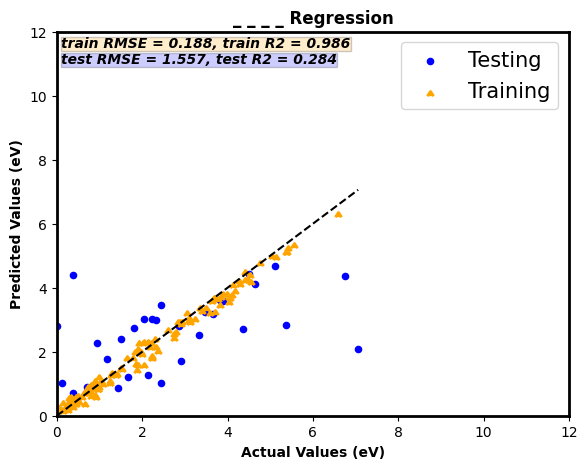

In [67]:
import matplotlib.pyplot as plt
import numpy as np

# Instantiate model
model = GradientBoostingRegressor()
# Fit model to training data
model.fit(x_train, y_train)

y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

import matplotlib.pyplot as plt
import numpy as np

# Calculate the evaluation metrics
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

# Print the evaluation metrics
#print(f"Training RMSE: {train_rmse:.3f}")
#print(f"Testing RMSE: {test_rmse:.3f}")
#print(f"Training R^2: {train_r2:.3f}")
#print(f"Testing R^2: {test_r2:.3f}")

# Plot the graph with automatic values
plt.scatter(y_test, y_pred_test, color='blue', label='Testing', s=20)
plt.text(.1, 11.5, f'train RMSE = {train_rmse:.3f}, train R2 = {train_r2:.3f}', style='italic', bbox={
       'facecolor': 'orange', 'alpha': 0.2, 'pad': .1}, fontweight='bold')
plt.text(.1, 11, f'test RMSE = {test_rmse:.3f}, test R2 = {test_r2:.3f}', style='italic', bbox={
        'facecolor': 'blue', 'alpha': 0.2, 'pad': .1}, fontweight='bold')
plt.scatter(y_train, y_pred_train, color='orange', label='Training', marker=6, linewidths=2, s=20)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='black')
plt.subplots_adjust(left=0.15, bottom=0.15, top=.95, right=0.95)
plt.ylim([0, 12])
plt.xlim([0, 12])

# Set bold font for all text elements
plt.title('_ _ _ _ Regression', fontweight='bold')
plt.xlabel('Actual Values (eV)', fontweight='bold')
plt.ylabel('Predicted Values (eV)', fontweight='bold')
plt.legend(fontsize=15)

# Set bold frame for the plot
plt.gca().spines['top'].set_linewidth(2)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)
plt.gca().spines['right'].set_linewidth(2)

#plt.savefig('finalCatBoost10kmodel.png', dpi=550, bbox_inches='tight')
plt.show()

